#**United States Census**
The following report is based on the united states income census datasheet containing the data on adults from the 1994 census. The main outcome of this EDA report is to determine the factors affecting the annual income of a USA citizen.

###About the datasheet:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using some pre-defined conditions.

###Dataset Description:

The dataset consists of 32,562 rows and 14 features. The description of each feature is given below:

1. Listing of attributes:  >50K, <=50K. 
2. age: continuous. 
3. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
4. fnlwgt: continuous. 
5. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
6. education-num: continuous. 
7. Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
8. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
9. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
10. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
11. sex: Female, Male. 
12. capital-gain: continuous. 
13. capital-loss: continuous. 
14. hours-per-week: continuous. 
15. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad & Tobago, Peru, Hong, Holand-Netherlands.
 

###Objectives:

1. Clean the data and drop useless columns.
2. Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features if necessary.
3. Visualize the distributions of various features and correlations between them.

In [0]:
#Import necessary libraries for future use in analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [0]:
#Reading dataset present in .csv format

df=pd.read_csv("https://raw.githubusercontent.com/rabidlearner/Exploratory-Data-Analysis-of-US-income-census/master/usa-income-census.csv")

##Dataset Structure 
The following code shows that the dataset contains 32561 rows and 15 columns.

In [3]:
df.shape

(32561, 15)

Now, Lets check how our data looks

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Data Pre-Processing
We see that there might not be any NAN or null value but an unknown value i.e. ? to be present in some columns at different rows.
This might be some missing or invalid value , hence we have to take suitable action against it. Therefore, we replace ''?'' with NAN so as to mark it as a missing value and not a valid input.

In [0]:
df=df.replace('?', np.nan)

We can now check how many null values our data contains:

In [6]:
pd.DataFrame(df.isnull().sum() , columns=['Null values in data'])

,Null values in data
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


The biggest thing to note here, is that the number of records containing null values are actually very low i.e. less than 10 percent of total records ; hence we can just remove these values. 
Duplicates are also removed as they are pretty useless for analysis.

In [0]:
df = df.dropna()
df = df.drop_duplicates()

In [8]:
pd.DataFrame(df.isnull().sum() , columns=['Null values in data'])

,Null values in data
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


Well now, our data is clean and can be proved by looking at the above table

##**Univariate Exploration**
Before we further proceed into the Univariate analysis , Let us look at the statistical summary of the data and also our data in-depth

In [9]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,30139.000000,30139,3.013900e+04,30139,30139.000000,30139,30139,30139,30139,30139,30139.000000,30139.000000,30139.000000,30139,30139
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22264,NaN,9834,NaN,14059,4034,12457,25912,20366,NaN,NaN,NaN,27487,22633
mean,38.441720,NaN,1.897950e+05,NaN,10.122532,NaN,NaN,NaN,NaN,NaN,1092.841202,88.439928,40.934703,NaN,NaN
std,13.131426,NaN,1.056586e+05,NaN,2.548738,NaN,NaN,NaN,NaN,NaN,7409.110596,404.445239,11.978753,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176275e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784170e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376045e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN




Now, we plot some frequency distributions or histograms to gain basic insights about our numeric attributes.

In [41]:
#counting numeric attributes

numeric_attribute = df.select_dtypes(include=['int'])
pd.DataFrame(columns=[numeric_attribute])

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week


Below , We start out with these 6 numeric attributes

skewness =  0.5289710877265393


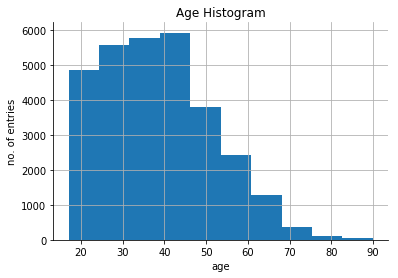

In [34]:
#Histograms

numeric_attribute1 = df['age']
numeric_attribute1.hist()
plt.title('Age Histogram')
plt.xlabel('age')
plt.ylabel('no. of entries')
print('skewness = ',numeric_attribute1.skew())
sns.despine()

Age lesser than 50 is the most common age among people in this dataset.

skewness =  11.898104207745183


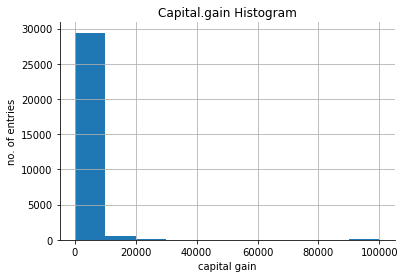

In [36]:
numeric_attribute2 = df['capital.gain']
numeric_attribute2.hist()
plt.title('Capital.gain Histogram')
plt.xlabel('capital gain')
plt.ylabel('no. of entries')
print('skewness = ',numeric_attribute2.skew())
sns.despine()

Most people didn't gain any capital.

skewness =  4.524408859698649


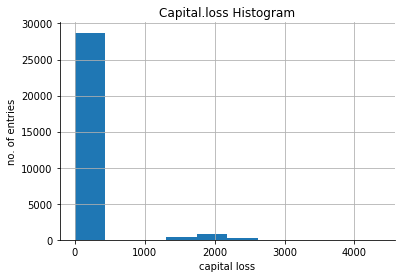

In [31]:
numeric_attribute3 = df['capital.loss']
numeric_attribute3.hist()
plt.title('Capital.loss Histogram')
plt.xlabel('capital loss')
plt.ylabel('no. of entries')
print('skewness = ',numeric_attribute3.skew())
sns.despine()

Most people didn't lose any capital.

skewness =  -0.30284490297576744


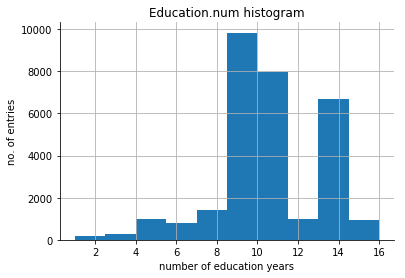

In [32]:
numeric_attribute4 = df['education.num']
numeric_attribute4.hist()
plt.title('Education.num histogram')
plt.xlabel('number of education years')
plt.ylabel('no. of entries')
print('skewness = ',numeric_attribute4.skew())
sns.despine()

Most people studied till 9-10 years.

skewness =  1.4600554384907176


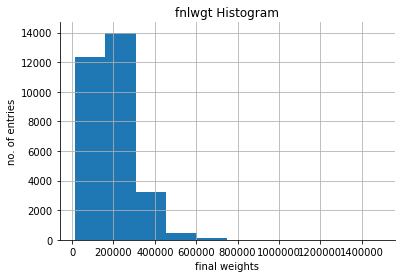

In [28]:
numeric_attribute5 = df['fnlwgt']
numeric_attribute5.hist()
plt.title('fnlwgt Histogram')
plt.xlabel('final weights')
plt.ylabel('no. of entries')
print('skewness = ',numeric_attribute5.skew())
sns.despine()

No. of people the census believes is less than 400000. 

*Note: This numeric attribute here is completely useless!*

skewness =  0.3323859714019701


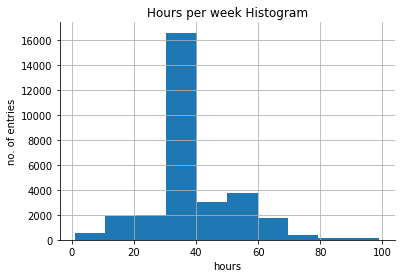

In [29]:
numeric_attribute6 = df['hours.per.week']
numeric_attribute6.hist()
plt.title('Hours per week Histogram')
plt.xlabel('hours')
plt.ylabel('no. of entries')
print('skewness = ',numeric_attribute6.skew())
sns.despine()

Maximum people work around 40 hrs per week.

###Basic Conclusion

The visualization of these numerical attributes give us a few interesting insights on the distribution of values.

1. Most of the individuals have an age < 50 while the maximum age is around 90.
2. In general, people do not make investments other than their regular income. However, there are very few people who invest, and there are also a small number of outliers who earn more than 90000 via capital gains. However, among the people who had a, capital loss the average loss looks to be around 2000.
3. On average, most of the people have studied till 9 to 10 years in the areas where the census was taken.
4. Most of the people work around 40 hrs per week. However there are a few who don't work and a few who work for almost 100 hours a week.

Note: The fnlwgt here looks completely useless when compared to our problem statement

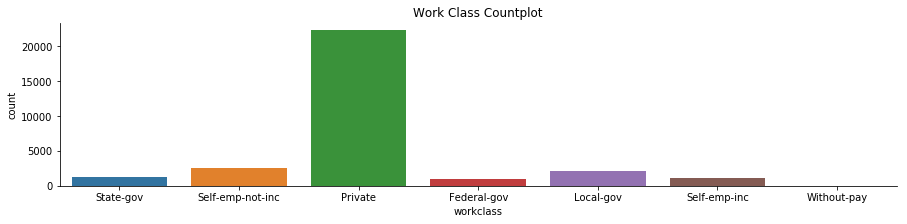

In [42]:
#work class countplot

categoric_attribute = df.select_dtypes(include=['object'])
plt.figure(figsize=(15,3))
sns.countplot(data= categoric_attribute, x="workclass")
plt.title('Work Class Countplot')
sns.despine()


The categorical attributes are now compared using count plot which gives us the insight that : Most of the people in the census survey are private employees.

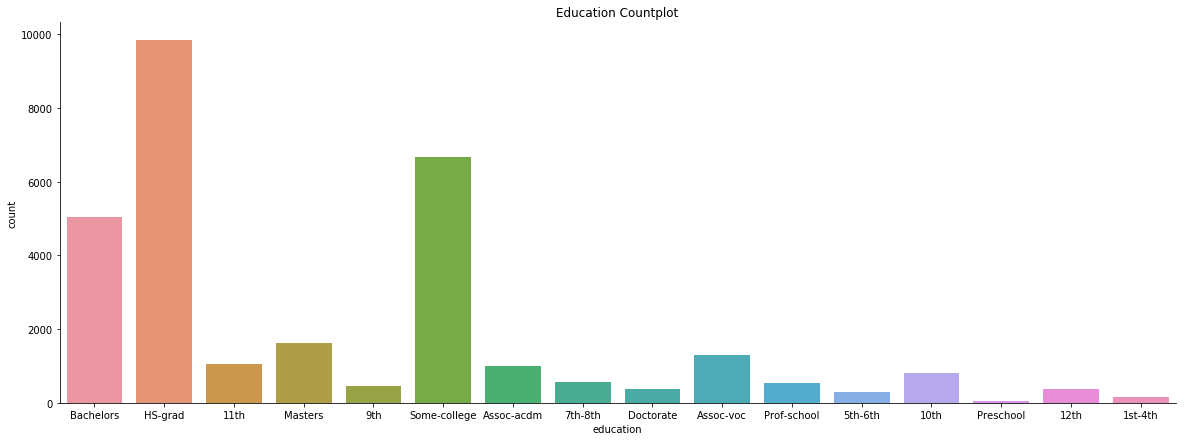

In [43]:
#Education count plot

plt.figure(figsize=(20,7))
plt.title('Education Countplot')
sns.countplot(data = categoric_attribute, x = "education")
sns.despine()

This shows that most of the people in the census are High school graduates. This column is same as education.num and we can ignore any one of these two when we proceed for correlation and model building.

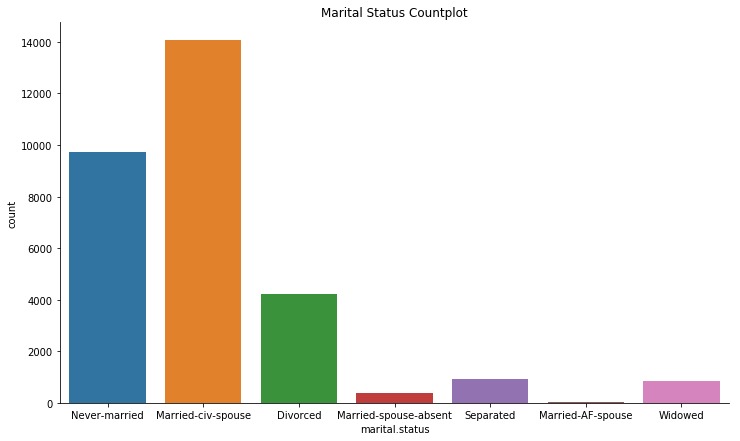

In [44]:
#Marital Status Countplot

plt.figure(figsize=(12,7))
plt.title('Marital Status Countplot')
sns.countplot(data = categoric_attribute, x = "marital.status")
sns.despine()

Most people in the survey are either married or unmarried.

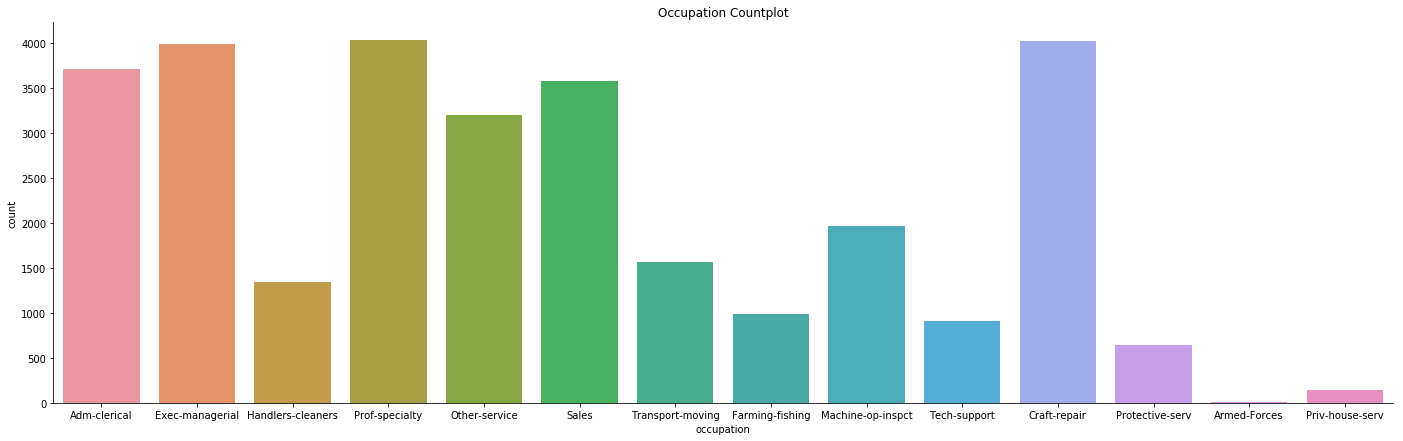

In [45]:
#Occupation Countplot

plt.figure(figsize=(24,7))
plt.title('Occupation Countplot')
sns.countplot(data = categoric_attribute, x = "occupation")
sns.despine()

Different occupations can be seen in this plot and we can later classify into smaller categories for better understanding. This also shows that not many army veterans were present during the census survey.

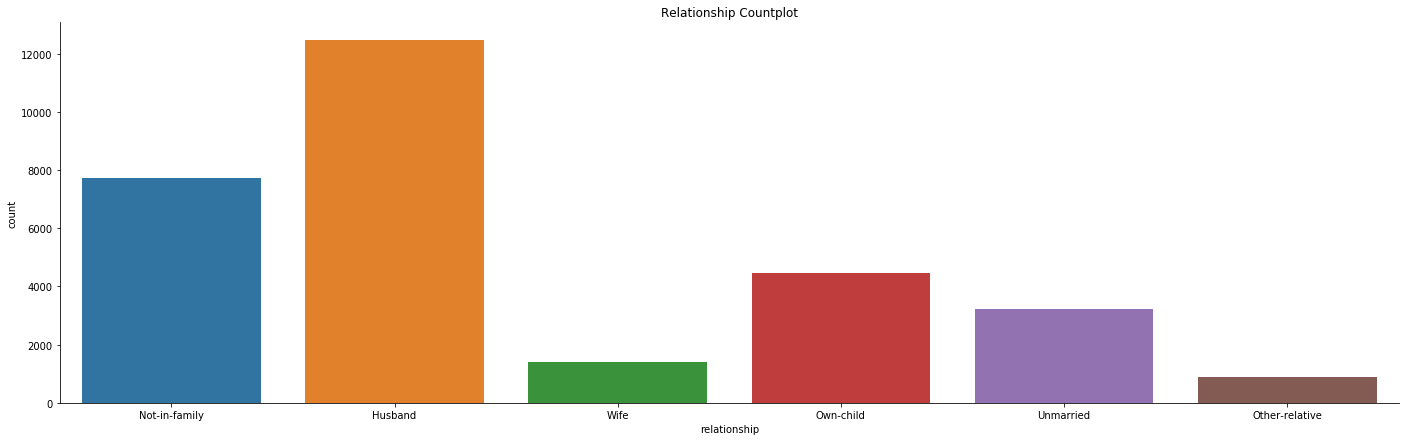

In [46]:
#Relationship Countplot

plt.figure(figsize=(24,7))
sns.countplot(data = categoric_attribute, x = "relationship")
plt.title('Relationship Countplot')
sns.despine()

Most of the people in this survey are husbands.

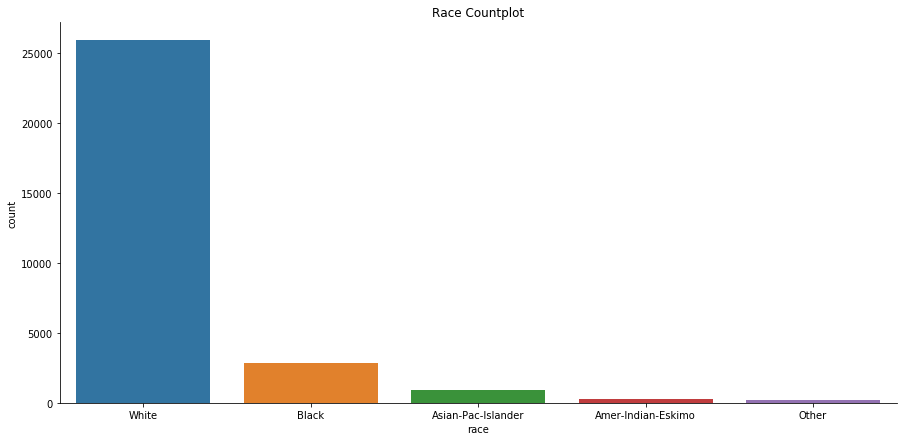

In [47]:
#Race Countplot

plt.figure(figsize=(15,7))
sns.countplot(data = categoric_attribute, x = "race")
plt.title('Race Countplot')
sns.despine()

This plot shows that the mojority of people in the us income census datasheet belong to white racial group and very few belong to other racial groups. Though it should not be forgotten that a considerate amount of black racial group are also present in the survey.

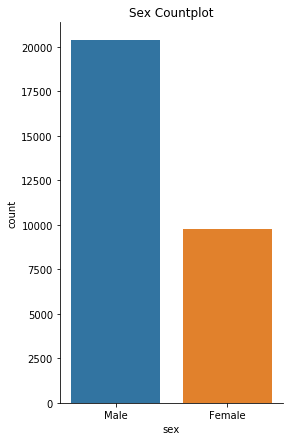

In [48]:
#Sex Countplot

plt.figure(figsize=(4,7))
sns.countplot(data = categoric_attribute, x = "sex")
plt.title('Sex Countplot')
sns.despine()

Majority of people who gave this survey were men which proves the earlier graph showing the count of husbands to be greater than any of the other relationship categories.

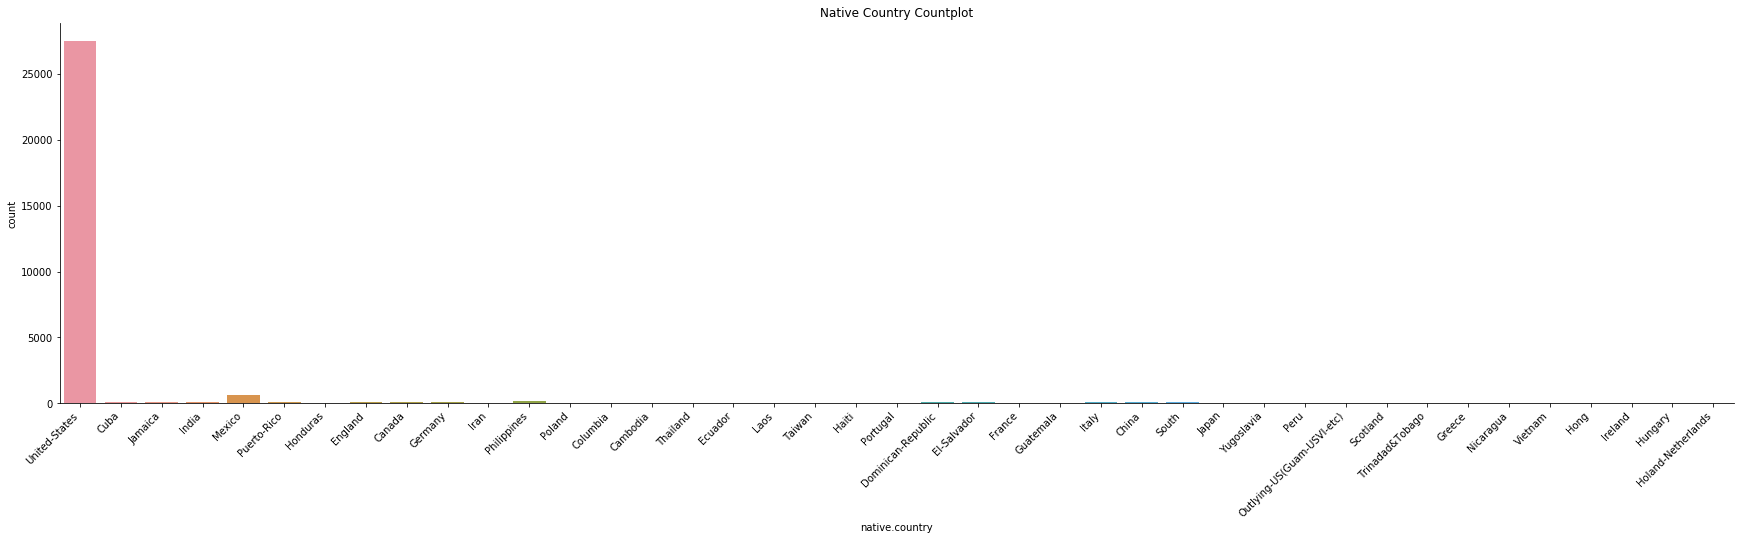

In [49]:
#Native country Countplot

plt.figure(figsize=(30,7))
a=sns.countplot(data = categoric_attribute, x = "native.country")
plt.title('Native Country Countplot')
a.set_xticklabels(
    a.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
sns.despine()

We can see here that, most of the people belong to United states and a very few people belong to other countries.

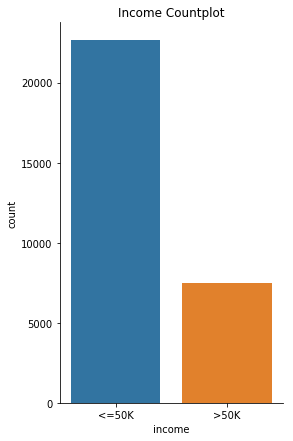

In [50]:
#Income Countplot

plt.figure(figsize=(4,7))
plt.title('Income Countplot')
sns.countplot(data = categoric_attribute, x = "income")
sns.despine()

Maximum number of people earn less than 50K. This graph can also be seen somewhat  left skewed.

##Bivariate and Multivariate exploration
We compare two or more variables so as to gain valuable insights about our data. We will look at the correlation of different variables with respect to our objective in hand i.e. income.

In [51]:
#Before going to bivariate and multivariate exploration we check the data again

df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
age               30139 non-null int64
workclass         30139 non-null object
fnlwgt            30139 non-null int64
education         30139 non-null object
education.num     30139 non-null int64
marital.status    30139 non-null object
occupation        30139 non-null object
relationship      30139 non-null object
race              30139 non-null object
sex               30139 non-null object
capital.gain      30139 non-null int64
capital.loss      30139 non-null int64
hours.per.week    30139 non-null int64
native.country    30139 non-null object
income            30139 non-null object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


The data is still clean , hence we move on.

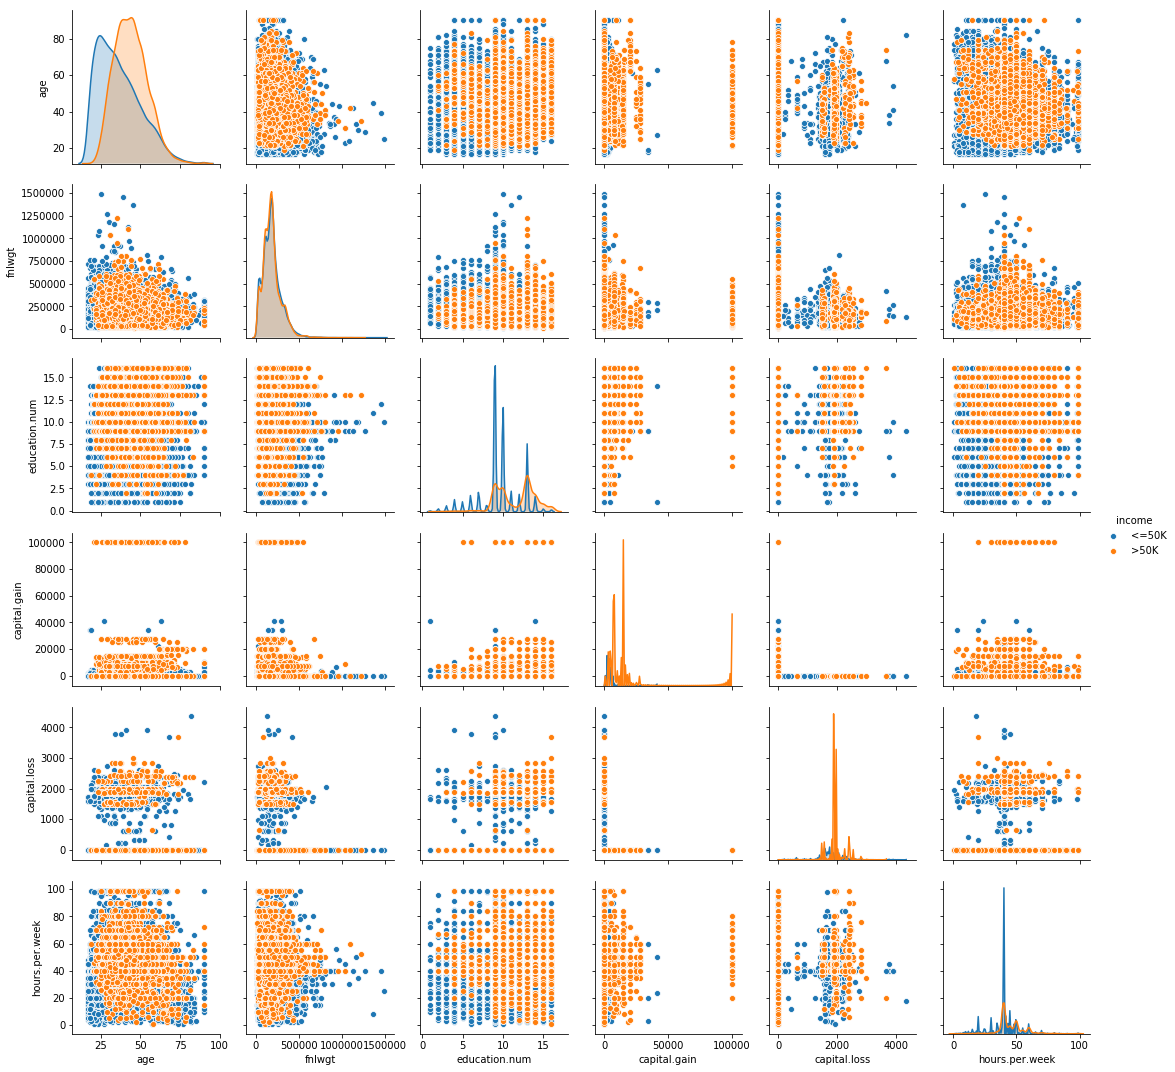

In [52]:
#pair plot with target variable i.e income

sns.pairplot(df, hue='income')
sns.despine()

So basically what we did here, was that we built a pair plot which is a mixture of histograms and scatter plots to show correlation between different attributes.


To see a better and understandable relationship between attributes, we draw a correlation heatmap for our dataset

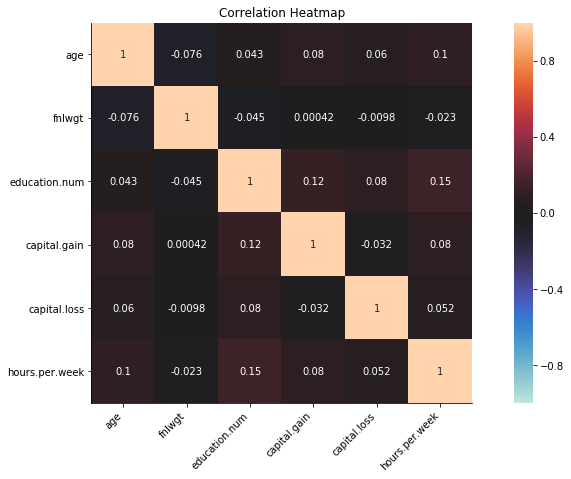

In [53]:
corr = df.corr()
fig=plt.figure(figsize=(15,7))
plt.title('Correlation Heatmap')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.despine()

We can't see a good correlation between these numeric attributes

But what we see is: 

1. The fnlwgt feature looks useless.
2. There is some correlation between age, hours.per.week and education.num according to both pair plot and correlation heatmap.
3. Capital.gain and Capital.loss don't anticorrelate a lot, which says people will invest only if they have money.

In [54]:
#Bivariate analysis

pd.crosstab(df['workclass'],df['sex'], margins=True)

sex,Female,Male,All
workclass,,,
Federal-gov,309,634,943
Local-gov,824,1243,2067
Private,7633,14631,22264
Self-emp-inc,126,948,1074
Self-emp-not-inc,392,2106,2498
State-gov,484,795,1279
Without-pay,5,9,14
All,9773,20366,30139


This cross tabulation method specifies the gender work-class ratio. This show that more number of men are  employed rather than women. The biggest difference can be seen in the gender ratio of self-employment.

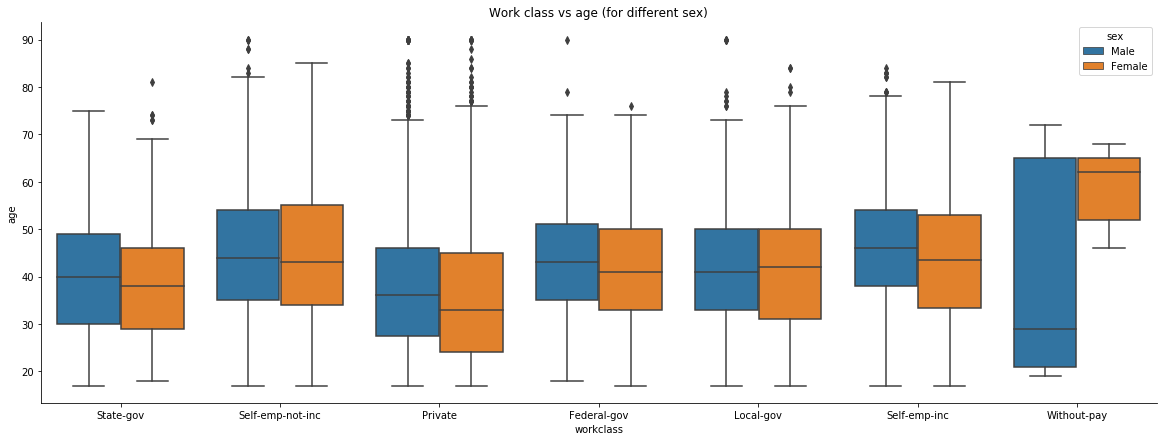

In [55]:
#Boxplot between workclass and age for different sex

plt.figure(figsize=(20,7))
plt.title('Work class vs age (for different sex)')
sns.boxplot(x="workclass",y="age", hue="sex", data=df)
sns.despine()

The box plot gives a few interesting observations:

1. People who have never worked have less age.
2. Women have a slightly higher median age than men for this working class.
3. Men who work without pay have a median age of around 20-30, whereas women who work without pay have a median age of around 60-65.
4. Most of the working class have a median age of around 40-50.

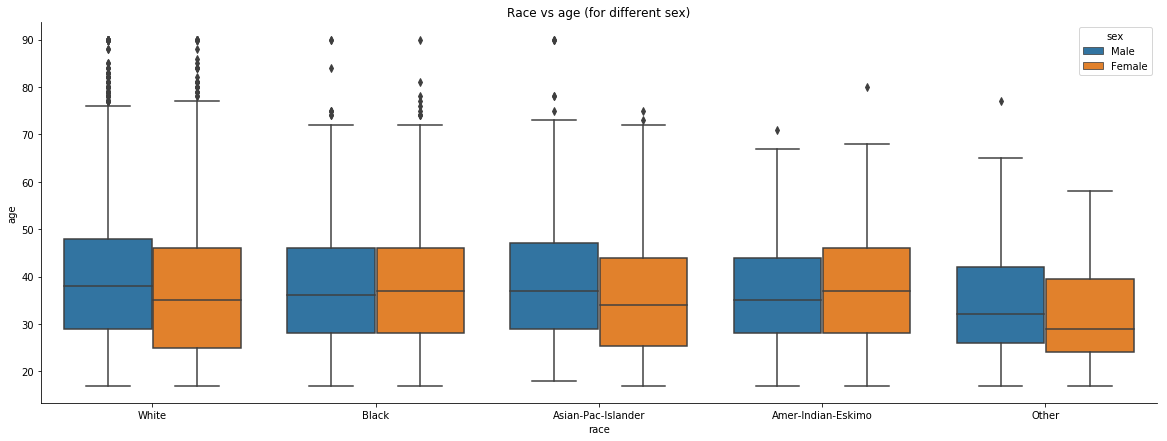

In [56]:
#Boxplot between race and age for different sex

plt.figure(figsize=(20,7))
plt.title('Race vs age (for different sex)')
sns.boxplot(x="race",y="age", hue="sex", data=df)
sns.despine()

People from "other" race have a younger median age than the rest of the races.

In [57]:
pd.crosstab(df['race'],df['sex'], margins=True)

sex,Female,Male,All
race,,,
Amer-Indian-Eskimo,107,179,286
Asian-Pac-Islander,294,600,894
Black,1399,1417,2816
Other,87,144,231
White,7886,18026,25912
All,9773,20366,30139


This above cross-tabulation gives a distribution of various races and sex. The number of males and females are very similar in all races except whites.

In [58]:
pd.crosstab(df['native.country'],df['sex'], margins=True)

sex,Female,Male,All
native.country,,,
Cambodia,2,16,18
Canada,34,73,107
China,18,50,68
Columbia,23,33,56
Cuba,38,54,92
Dominican-Republic,34,33,67
Ecuador,9,18,27
El-Salvador,33,67,100
England,30,56,86



We can see that the cross tabulation values do not give interesting results when the number of categories are huge. 

So what can we do? We could reduce the categories, like native-country to Non-USA, USA, group ages to specific ranges, etc.

In [59]:
# Table showing Karl-Pearsons coefficient of correlation 

df.corr(method='pearson')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education.num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital.gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital.loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours.per.week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


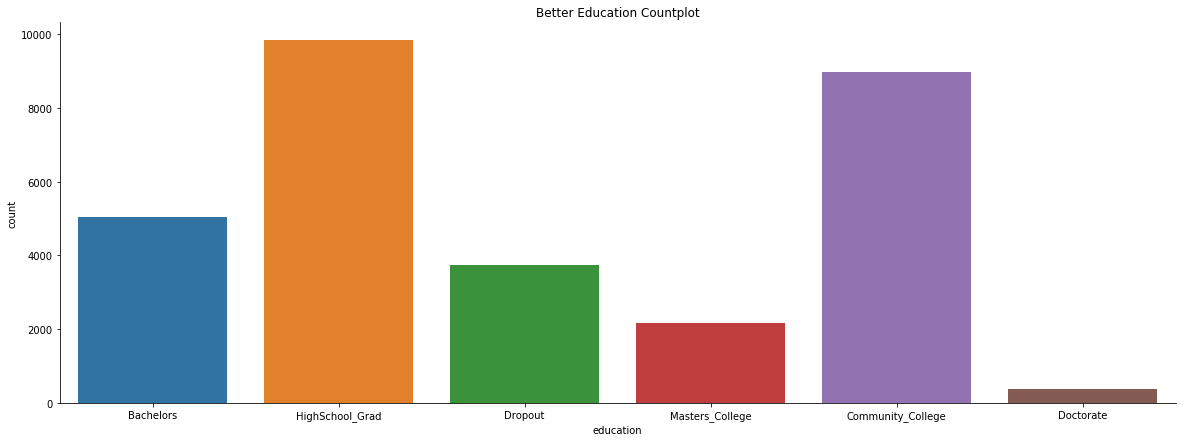

In [60]:
#Grouping Education

df['education'].replace('Preschool', 'Dropout',inplace=True)
df['education'].replace('10th', 'Dropout',inplace=True)
df['education'].replace('11th', 'Dropout',inplace=True)
df['education'].replace('12th', 'Dropout',inplace=True)
df['education'].replace('1st-4th', 'Dropout',inplace=True)
df['education'].replace('5th-6th', 'Dropout',inplace=True)
df['education'].replace('7th-8th', 'Dropout',inplace=True)
df['education'].replace('9th', 'Dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighSchool_Grad',inplace=True)
df['education'].replace('HS-grad', 'HighSchool_Grad',inplace=True)
df['education'].replace('Some-college', 'Community_College',inplace=True)
df['education'].replace('Assoc-acdm', 'Community_College',inplace=True)
df['education'].replace('Assoc-voc', 'Community_College',inplace=True)
df['education'].replace('Prof-school', 'Masters_College',inplace=True)
df['education'].replace('Masters', 'Masters_College',inplace=True)

fig = plt.figure(figsize=(20,7))
plt.title('Better Education Countplot')
sns.countplot(x="education", data=df)
sns.despine()

In [61]:
pd.crosstab(df['education'],df['sex'], margins=True)

sex,Female,Male,All
education,,,
Bachelors,1521,3521,5042
Community_College,3353,5631,8984
Doctorate,81,294,375
Dropout,1118,2618,3736
HighSchool_Grad,3104,6730,9834
Masters_College,596,1572,2168
All,9773,20366,30139


This gives a good idea about the relation between gender and education level. This also signifies that more men do Masters and Doctorate compared to women.

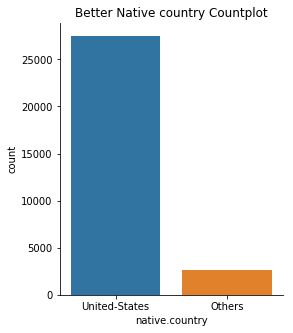

In [62]:
#Grouping other native countries as Others

df['native.country'] = df['native.country'].apply(lambda x: "United-States" if x == "United-States" else "Others")

fig = plt.figure(figsize=(4,5))
plt.title('Better Native country Countplot')
sns.countplot(x="native.country", data=df)
sns.despine()

In [63]:
pd.crosstab(df['native.country'],df['sex'], margins=True)

sex,Female,Male,All
native.country,,,
Others,847,1805,2652
United-States,8926,18561,27487
All,9773,20366,30139



The ratio of men and women from US as well as other natives are more or less similar, however, the number of US natioanls are considerably more in the dataset.

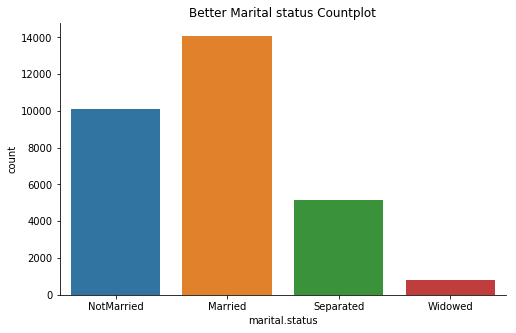

In [64]:
#Grouping marital status

df['marital.status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital.status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital.status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital.status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital.status'].replace(['Separated'], 'Separated',inplace=True)
df['marital.status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital.status'].replace(['Widowed'], 'Widowed',inplace=True)

fig = plt.figure(figsize=(8,5))
plt.title('Better Marital status Countplot')
sns.countplot(x="marital.status", data=df)
sns.despine()

In [65]:
pd.crosstab(df['marital.status'],df['sex'], margins=True)

sex,Female,Male,All
marital.status,,,
Married,1492,12588,14080
NotMarried,4494,5587,10081
Separated,3101,2050,5151
Widowed,686,141,827
All,9773,20366,30139


The above cross tabulation and countplot shows a better visualisation of the marital status column. 

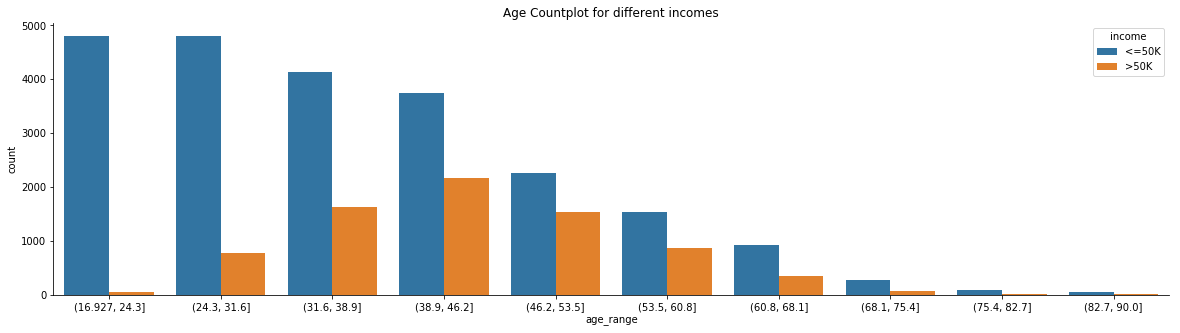

In [66]:
# Ranges for age
df['age_range'] = pd.cut(df['age'], 10)

# Count plot for age and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="age_range", hue="income", data=df)
plt.title('Age Countplot for different incomes')
sns.despine()


The above plot shows that experience matters to earn more income. More aged and experienced people earn more than lesser experienced and younger people.

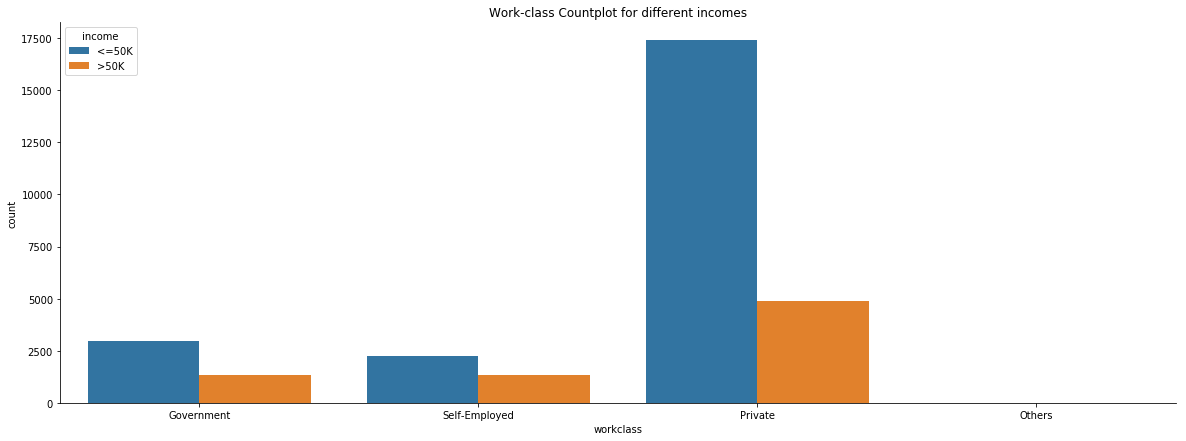

In [67]:
#Grouping workclass

df['workclass'].replace('State-gov', 'Government',inplace=True)
df['workclass'].replace('Self-emp-not-inc', 'Self-Employed',inplace=True)
df['workclass'].replace('Private', 'Private',inplace=True)
df['workclass'].replace('Federal-gov', 'Government',inplace=True)
df['workclass'].replace('Local-gov', 'Government',inplace=True)
df['workclass'].replace('Self-emp-inc', 'Self-Employed',inplace=True)
df['workclass'].replace('Without-pay', 'Others',inplace=True)
df['workclass'].replace('Never-worked', 'Others',inplace=True)

fig = plt.figure(figsize=(20,7))
sns.countplot(x="workclass", hue="income", data=df)
plt.title('Work-class Countplot for different incomes')
sns.despine()

This visualisation tells us that private sector employees earn more when compared to other work classes but people who are self employed have highest probability of earning more income.

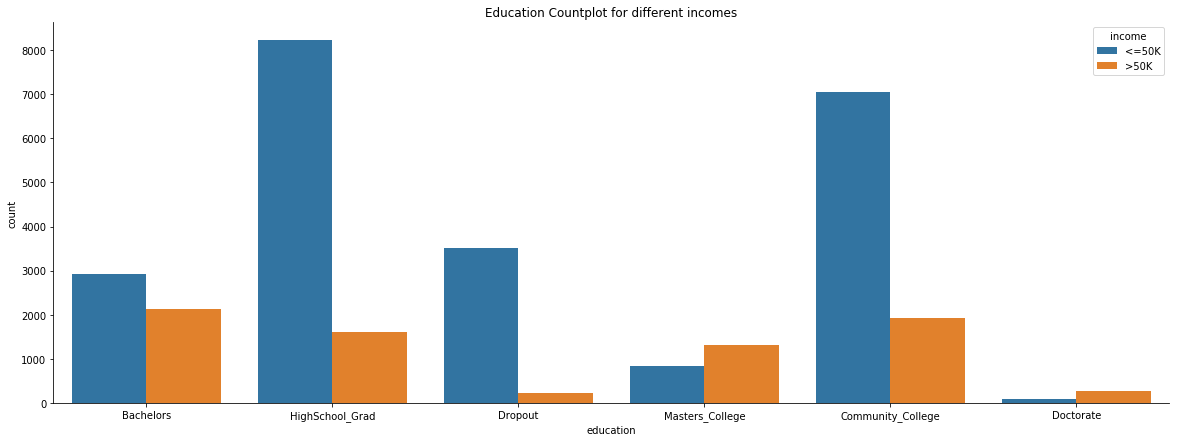

In [68]:
fig = plt.figure(figsize=(20,7))
sns.countplot(x="education", hue="income", data=df)
plt.title('Education Countplot for different incomes')
sns.despine()


Higher is one's education level, higher he/she earns.

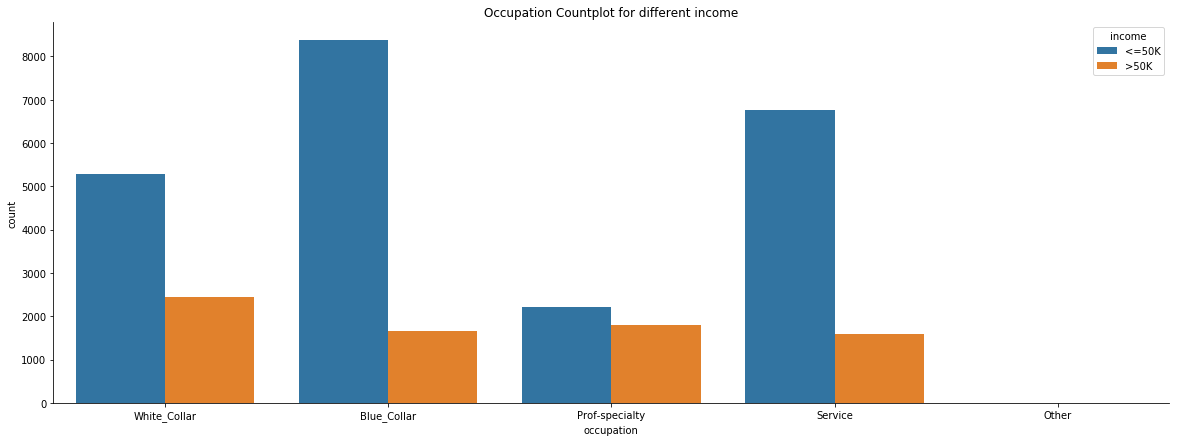

In [69]:
#Grouping Occupations

df['occupation'].replace('Adm-clerical', 'White_Collar',inplace=True)
df['occupation'].replace('Exec-managerial', 'White_Collar',inplace=True)
df['occupation'].replace('Handlers-cleaners', 'Blue_Collar',inplace=True)
df['occupation'].replace('Prof-speciality', 'Professional',inplace=True)
df['occupation'].replace('Other-service', 'Service',inplace=True)
df['occupation'].replace('Sales', 'Service',inplace=True)
df['occupation'].replace('Craft-repair', 'Blue_Collar',inplace=True)
df['occupation'].replace('Transport-moving', 'Blue_Collar',inplace=True)
df['occupation'].replace('Farming-fishing', 'Blue_Collar',inplace=True)
df['occupation'].replace('Machine-op-inspct', 'Blue_Collar',inplace=True)
df['occupation'].replace('Tech-support', 'Service',inplace=True)
df['occupation'].replace('Protective-serv', 'Service',inplace=True)
df['occupation'].replace('Armed-Forces', 'Other',inplace=True)
df['occupation'].replace('Priv-house-serv', 'Blue_Collar',inplace=True)

#Count plot for occupation and income
fig = plt.figure(figsize=(20,7))
sns.countplot(x="occupation", hue="income", data=df)
plt.title('Occupation Countplot for different income')
sns.despine()

People working White Collar positions earn comparitively more than people in other positions.

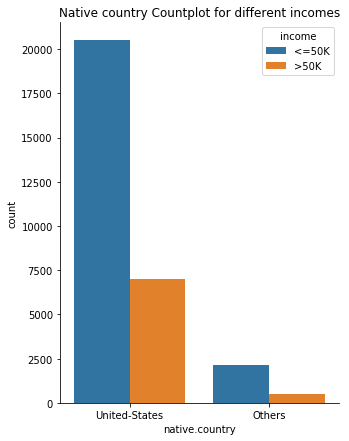

In [70]:
fig = plt.figure(figsize=(5,7))
sns.countplot(x="native.country", hue="income", data=df)
plt.title('Native country Countplot for different incomes')
sns.despine()

This plot shows that the people having native country as United states have higher income earning count than the natives of other countries, but if we compare the ratio of people in united states in this graph we would see a suprise change i.e. the number of people having other countries as their native country are actually earning more than the united states natives. 

This graph is extremely important and highly suprising!

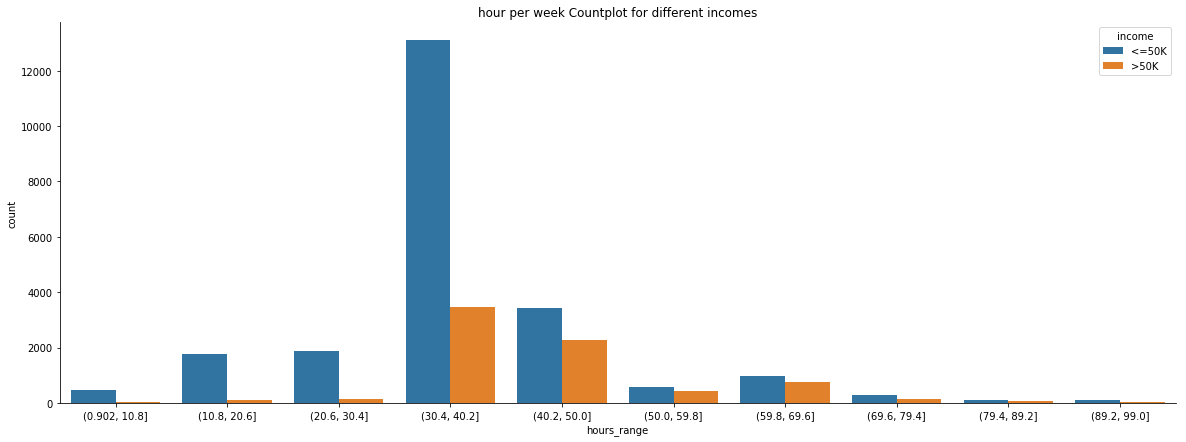

In [71]:
df['hours_range'] = pd.cut(df['hours.per.week'], 10)

#Count plot for hours per week range and income
fig = plt.figure(figsize=(20,7))
sns.countplot(x="hours_range", hue="income", data=df)
plt.title('hour per week Countplot for different incomes')
sns.despine()

People on average work 30-40 hours a week, but if the person works more, the probability of the person getting paid >50K increases.

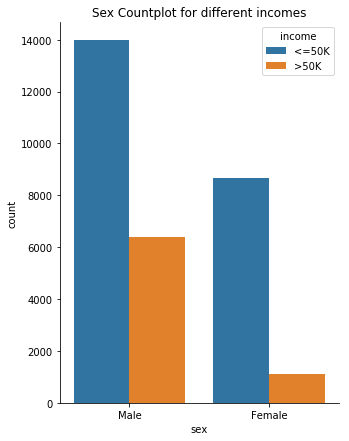

In [72]:
fig = plt.figure(figsize=(5,7))
sns.countplot(x="sex", hue="income", data=df)
plt.title('Sex Countplot for different incomes')
sns.despine()

The ratio of males earning more than 50k is greater than the ratio of females earning more than 50k.

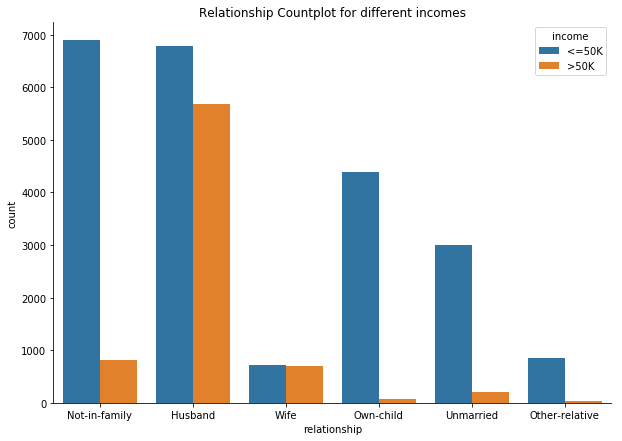

In [73]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income", data=df)
plt.title('Relationship Countplot for different incomes')
sns.despine()


Husbands and Wives have a lot more probability to earn money >50k than anybody else.

##Data Processing
If we remember that earlier we were getting not-so-great correlation between attributes and also there were some useless attributes present in the dataset. 

To get a better correlation we must either drop or replace those data from the dataset. 


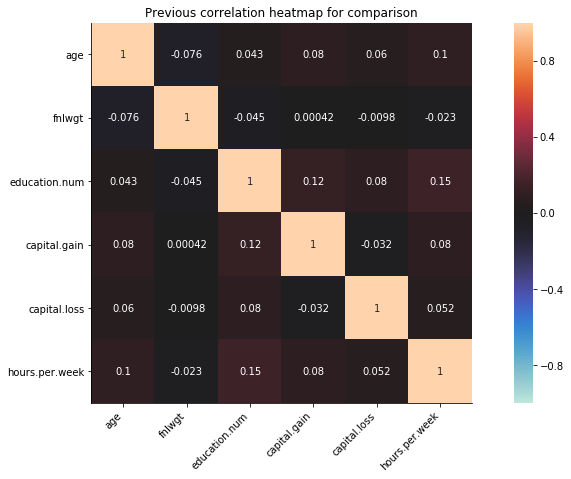

In [74]:
#Drawing the earlier correlation heatmap for comparison

corr = df.corr()
fig=plt.figure(figsize=(15,7))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot=True)
plt.title('Previous correlation heatmap for comparison')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.despine()

Values to be dropped: 

1. fnlwgt : This attribute is useless, as it does not have any correlation with any other attribute. We will drop this attribute.
2. capital.gain/capital.loss : We will add capital gain and loss to a column "total_capital" rather than keeping two columns having different values.

Hence now, we will drop the missing values, and the outliers i.e >75k income gain values as seen previously.

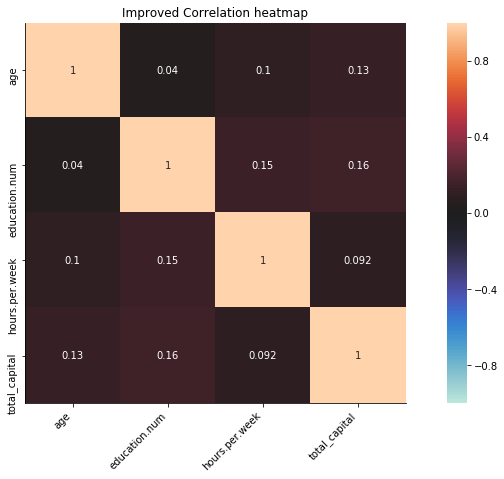

In [75]:
#Dropping the column fnlwgt

df = df.drop(columns='fnlwgt')

#Removing outliers

x = df[df['capital.gain'] > 75000].index
df = df.drop(x)

#Combining capital-gain and capital-loss into 1 column

df['total_capital'] = df.apply(lambda x: x['capital.gain'] + x['capital.loss'], axis=1)
df = df.drop(columns='capital.gain')
df = df.drop(columns='capital.loss')

corr = df.corr()
fig=plt.figure(figsize=(15,7))
plt.title('Improved Correlation heatmap')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.despine()

## Final Conclusion
The visualizations and interpretations of the now edited categorical attributes have been shown already in the previous part. Hence, These correlations are better than before and this dataset can now be used for various predictions.

**Were there any interesting or surprising interactions between features?**

The countplot between native countries for different income suggested that people having "other" country as their native country earned more than the people who were United States natives.